In [99]:
from google.colab import files

In [100]:
files.upload()

Saving earthquakePredicton.csv to earthquakePredicton (6).csv


{'earthquakePredicton.csv': b'\xef\xbb\xbfb-value,Mean square deviation,Magnitude deficit,Elapsed days,Mean magnitude,Rate of square root of energy released,Mean time between characteristic events,Coefficient of variation from mean time,Earthquake\r\n0.711503371,0.023204673,-0.041017564,1523,4.786,161661312.2,125.4,1.835091385,1\r\n0.720146402,0.028710592,0.00712371,1585,4.758,143191758.5,153.4,1.967989743,1\r\n0.729226686,0.033236489,0.037639451,1532,4.758,147567492,132.0909091,1.498028898,1\r\n0.726864855,0.03377589,0.025779897,1555,4.762,146381908.8,122.3333333,1.350057896,1\r\n0.724445578,0.034953026,0.012060283,1528,4.768,150373321.3,114.9230769,1.265997442,1\r\n0.724521993,0.036272405,0.007463713,1509,4.774,153273749.4,114.9230769,1.265997442,1\r\n0.726233526,0.035543479,0.016903544,1496,4.77,153644373.6,108.6153846,1.147357649,1\r\n0.731843805,0.032581721,0.021004405,1414,4.778,163042160.6,91,0.995105208,1\r\n0.732318042,0.033685835,0.018582547,1407,4.784,164762077.9,91,0.995105

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [102]:
df=pd.read_csv('earthquakePredicton.csv')

In [103]:
df

,b-value,Mean square deviation,Magnitude deficit,Elapsed days,Mean magnitude,Rate of square root of energy released,Mean time between characteristic events,Coefficient of variation from mean time,Earthquake
0,0.711503,0.023205,-0.041018,1523,4.786,161661312.2,125.400000,1.835091,1
1,0.720146,0.028711,0.007124,1585,4.758,143191758.5,153.400000,1.967990,1
2,0.729227,0.033236,0.037639,1532,4.758,147567492.0,132.090909,1.498029,1
3,0.726865,0.033776,0.025780,1555,4.762,146381908.8,122.333333,1.350058,1
4,0.724446,0.034953,0.012060,1528,4.768,150373321.3,114.923077,1.265997,1
...,...,...,...,...,...,...,...,...,...
490,0.940462,0.032092,-0.618760,301,4.498,367714381.0,69.750000,1.179847,0
491,0.941424,0.033224,-0.620046,300,4.504,371478864.4,69.750000,1.179847,1
492,1.068925,0.056018,-0.422228,322,4.496,336881763.1,77.666667,1.113355,1
493,1.188720,0.056339,-0.317802,305,4.506,354762713.4,67.500000,0.707107,0


In [104]:
df.isnull().sum()

b-value                                    0
Mean square deviation                      0
Magnitude deficit                          0
Elapsed days                               0
Mean magnitude                             0
Rate of square root of energy released     0
Mean time between characteristic events    0
Coefficient of variation from mean time    0
Earthquake                                 0
dtype: int64

In [105]:
x=df.drop(['Earthquake'],axis=1)
y=df['Earthquake']

In [106]:
norm = MinMaxScaler().fit(x)
x = norm.fit_transform(x)

In [107]:
x

array([[0.20910109, 0.36762351, 0.59253289, ..., 0.03342841, 0.33087071,
        0.02603891],
       [0.2177704 , 0.46083588, 0.62458208, ..., 0.01673094, 0.40474934,
        0.02792466],
       [0.22687829, 0.53745698, 0.64489739, ..., 0.02068684, 0.34852483,
        0.02125618],
       ...,
       [0.56760886, 0.92314229, 0.33874858, ..., 0.19183709, 0.20492524,
        0.01579788],
       [0.6877681 , 0.92857694, 0.40826881, ..., 0.20800243, 0.17810026,
        0.01003344],
       [0.63495721, 0.69439907, 0.42675608, ..., 0.20603446, 0.20668426,
        0.01586517]])

In [108]:
Forest=RandomForestClassifier(n_estimators=10)
KNN=KNeighborsClassifier(n_neighbors=23)
Tree=DecisionTreeClassifier()
GNB=GaussianNB()
Logi=LogisticRegression()
Support=SVC(gamma='auto')

In [109]:
Algo=[Forest,KNN,Tree,GNB,Logi,Support]

In [110]:
Algo_name=["RFC","KNN","Tree","GNB","Logi","Support"]
Scores=[]
Average=[]
for i in Algo:
  cv_score=cross_val_score(i,x,y,cv=3)
  Scores.append(cv_score)
  Average.append(cv_score.mean())
Algo_name=pd.DataFrame(Algo_name,columns=['Algorithm name'])
Scores=pd.DataFrame(Scores)
Average=pd.DataFrame(Average,columns=['Average'])
Table=pd.concat([Algo_name,Scores],axis=1)
Table=pd.concat([Table,Average],axis=1)
Table

,Algorithm name,0,1,2,Average
0,RFC,0.496970,0.393939,0.539394,0.476768
1,KNN,0.484848,0.236364,0.460606,0.393939
2,Tree,0.539394,0.387879,0.539394,0.488889
3,GNB,0.545455,0.460606,0.472727,0.492929
4,Logi,0.527273,0.424242,0.448485,0.466667
5,Support,0.533333,0.503030,0.436364,0.490909


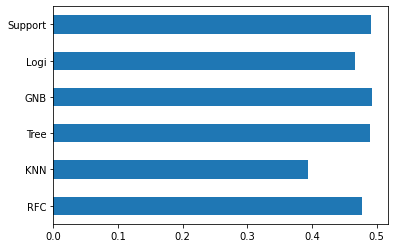

In [111]:
Average=list(Table['Average'])
pd.Series(Average,index=list(Table['Algorithm name'])).plot(kind='barh')

In [112]:
Best=Algo[Average.index(max(Average))]

In [113]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [114]:
xtrain

array([[0.76235469, 0.59722671, 0.4592288 , ..., 0.03497785, 0.24726724,
        0.022372  ],
       [0.36180545, 0.10995649, 0.46580007, ..., 0.12544035, 0.20686016,
        0.01350407],
       [0.57915781, 0.63722243, 0.44500573, ..., 0.09622651, 0.176781  ,
        0.01652503],
       ...,
       [0.33291592, 0.52148342, 0.75739283, ..., 0.21492903, 0.        ,
        0.        ],
       [0.15472882, 0.15545807, 0.35817363, ..., 0.29278441, 0.16622691,
        0.01347555],
       [0.64901214, 0.24492889, 0.49987098, ..., 0.05951249, 0.21748963,
        0.01045998]])

In [115]:
Best.fit(xtrain,ytrain)

GaussianNB()

In [116]:
Best.score(xtest,ytest)

0.5656565656565656

In [117]:
from sklearn.metrics import confusion_matrix,classification_report
pred=Best.predict(xtest)
confusion_matrix(ytest,pred)

array([[41,  4],
       [39, 15]])

In [118]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.51      0.91      0.66        45
           1       0.79      0.28      0.41        54

    accuracy                           0.57        99
   macro avg       0.65      0.59      0.53        99
weighted avg       0.66      0.57      0.52        99



In [119]:
Best.predict([[0.711503,0.023205,-0.041017564,1523,4.786,161661312.2,125.4,1.835091385]])

array([0])

In [120]:
Best.predict_proba([[0.711503,0.023205,-0.041017564,1523,4.786,161661312.2,125.4,1.835091385]])

array([[1., 0.]])

In [121]:
Final = Best.predict_proba([[0.711503,0.023205,-0.041017564,1523,4.786,161661312.2,125.4,1.835091385]])

In [122]:
pd.DataFrame(Final)

,0,1
0,1.0,0.0
